In [18]:
import os
print(os.listdir("/kaggle/input/filtered-titanic-train-csv"))

['filtered_titanic_train.csv']


In [19]:
import pandas as pd
df = pd.read_csv("/kaggle/input/filtered-titanic-train-csv/filtered_titanic_train.csv",delimiter=",",encoding="utf-8")
print(df.head(5))

   0  1  2  3  4  5  6  7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  0  0  0  1  0  0  0  0  0  1  ...   0   0   1   0   0  19   0   0   0   
1  0  0  0  1  0  0  0  0  0  3  ...   0   0   1   0   0  19   0   0   0   
2  1  0  0  0  1  0  0  0  0  3  ...   0   0   0   0   0  19   0   0   0   
3  0  0  0  1  0  0  0  0  0  1  ...   0   0   1   0   0  32   0   0   0   
4  0  0  0  1  0  0  0  0  0  3  ...   0   0   1   0   0  28   0   0   0   

   target  
0       0  
1       0  
2       1  
3       0  
4       0  

[5 rows x 21 columns]


# Feature Transformation

## 1. Principal Component Analysis (PCA)

### Step 1: Standardization

**Why do we do this?**

- Different features may have different scales.  
- Example:  
  - Age → 20–70  
  - Salary → 20,000–1,00,000  
- Without standardization, models like **KNN, SVM, Regression** get biased towards large-scale features.  
- **Standardization** puts all variables on the same scale so the algorithm treats them fairly.
### Steps:
  
- Create StandardScaler object.
- fit() → computes mean & std of each column.
- transform() → applies z-score formula.
- fit_transform() → both in one step.
- Output = NumPy array (scikit-learn uses NumPy internally).
- Convert back to DataFrame to keep column names.



In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   #StandardScaler Object
standardized=scaler.fit_transform(df) 
standardized_df = pd.DataFrame(standardized,columns=df.columns)
print(standardized_df.head(3))

          0       1         2         3         4        5         6  \
0 -0.493470 -0.1066 -0.069561  0.843527 -0.731083 -0.05675 -0.292174   
1 -0.493470 -0.1066 -0.069561  0.843527 -0.731083 -0.05675 -0.292174   
2  2.026464 -0.1066 -0.069561 -1.185498  1.367833 -0.05675 -0.292174   

          7         8         9  ...        11       12        13        14  \
0 -0.448665 -0.413585 -1.589202  ... -0.098613 -0.05675  0.634943 -0.208689   
1 -0.448665 -0.413585  0.819734  ... -0.098613 -0.05675  0.634943 -0.208689   
2 -0.448665 -0.413585  0.819734  ... -0.098613 -0.05675 -1.574943 -0.208689   

         15        16       17        18      19    target  
0 -0.069561 -0.755965 -0.05675 -0.114053 -0.1066 -0.788921  
1 -0.069561 -0.755965 -0.05675 -0.114053 -0.1066 -0.788921  
2 -0.069561 -0.755965 -0.05675 -0.114053 -0.1066  1.267555  

[3 rows x 21 columns]


#  Principal Component Analysis (PCA) & Scatter Plot

##  What is PCA?

* **PCA (Principal Component Analysis)** = Dimensionality Reduction Technique.
* It transforms correlated features → **new uncorrelated features (Principal Components, PCs)**.
* Each PC = linear combination of original features.
* **PC1** captures max variance (most info), **PC2** captures next highest variance (orthogonal to PC1), and so on.


##  Variance = Information

* Variance = how spread out the data is.
* PCA assumes **features with higher variance contain more useful patterns**.
* Lower-variance components often = noise.

---

## Choosing Number of Components

* If we choose **2 components** → can plot in 2D (PC1 vs PC2).
* More components → preserve more variance (information).
* Trade-off: **fewer PCs = simplicity, but risk of losing info**.

##  Why only 2 components (PC1 & PC2)?

* When we do PCA, we can create as many components as the number of original features.

* But for visualization, we usually take only 2 components because:

* They allow us to plot a 2D scatter plot (easy to see).

* PC1 & PC2 usually capture the maximum variance (information) in the data.

## What percentage of the variance in the dataset is explained by PC1 and PC2?  
* If PC1+PC2 explain a very high % (say >85%), then your 2D scatter plot is enough to understand the dataset structure.

* If not, you may need more PCs (PC3, PC4...).


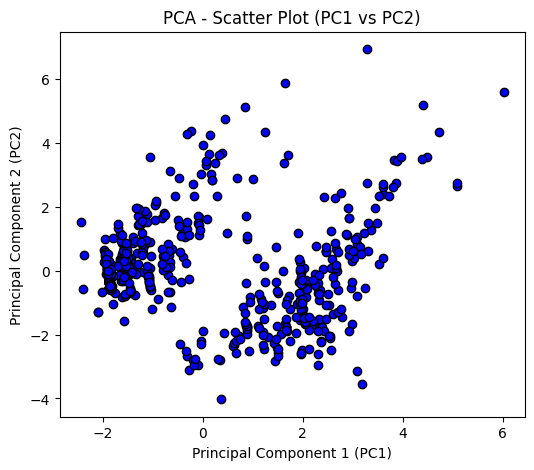

In [27]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(standardized_df)
pca_df=pd.DataFrame(pca_data,columns=["PC1","PC2"])

#Plotting a scatter plot 
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c="blue", edgecolors="k")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA - Scatter Plot (PC1 vs PC2)")
plt.show()